# Lab 13: Solutions for Final Exam Practice Questions

In [1]:
require(tidyverse)
library(modelr)
library(nycflights13)
library(fivethirtyeight)

options(repr.plot.width=4, repr.plot.height=4)

Loading required package: tidyverse
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# 2

* I want to join weather data for the specific hour and departure airport corresponding to each flight in the flights table.

In [2]:
weather = nycflights13::weather
flights = nycflights13::flights

In [3]:
head(flights) %>% select(flight, time_hour)

flight,time_hour
1545,2013-01-01 05:00:00
1714,2013-01-01 05:00:00
1141,2013-01-01 05:00:00
725,2013-01-01 05:00:00
461,2013-01-01 06:00:00
1696,2013-01-01 05:00:00


* About how many rows should the resulting table have?

For each flight we get the weather information. So it shouldn't be different than number of rows  `flights` data have.

In [4]:
nrow(flights)

[1] 336776

* Suppose I use the following command to perform this merge: 
left_join(flights, weather, by=c("origin", "hour")) 
Approximately how many rows will the resulting table have?

* Explain what went wrong, and provide the correct command needed to perform the merge.

In [5]:
# do not run!
# left_join(flights, weather, by=c("origin", "hour"))
# do not run! 

Let's try it with single observation of flights data

In [6]:
flights_one = flights %>% head(1)

In [7]:
flights_one

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00


In [8]:
flights_one %>% left_join(weather, by = c("origin", "hour")) %>% summarise(n())

n()
364


What went wrong? Only for one observation in `flights` we got around $365$ observations. Because if we use `hour`, join operator uses  (`EWR, 5`) as a key and include all matched keys in weather variable. So approximately it will be $365\times336776$ 

Correct command:

In [9]:
joined_correct = left_join(flights, weather, by=c("origin", "time_hour"))
dim(joined_correct)

[1] 336776     32

# 3

* Explain why this figure is misleading, and supply code to produce a less deceiving plot.

It starts around count = $10000$. Quite deceiving!

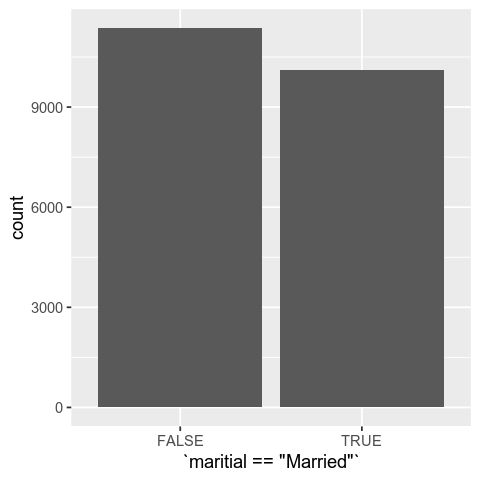

In [10]:
gss_cat %>% mutate('maritial == "Married"' = marital == "Married") %>% 
ggplot(aes(`maritial == "Married"`)) + geom_bar()

# 4

The following command loads the complete text of Shakespeare’s Hamlet into a vector called hamlet:
```
hamlet = readr::read_lines("https://git.io/vpeOg")
```
Each vector entry represents one line. Character names are in ALL CAPS: “HAMLET”, “HORATIO”,
etc.

- What are the longest word(s) used in Hamlet?

In [11]:
library(tidytext)
hamlet = readr::read_lines("https://git.io/vpeOg")
d = tibble(txt = hamlet)
dw = d %>% unnest_tokens(word, txt) %>% mutate(len = nchar(word))
dw%>% arrange(desc(len)) %>%head(20)

word,len
unproportioned,14
transformation,14
understanding,13
understanding,13
circumscribed,13
entertainment,13
imperfections,13
encompassment,13
understanding,13
circumstances,13


- What if you include hyphenated words?

In [12]:
dh = d %>% unnest_tokens(word, txt, 
                         token = str_split, 
                         pattern = "\\s") # passing regex to unnest token

dh %>% mutate(word = str_replace_all(word, pattern = "[^\\w-]", replacement = "")) %>%
mutate(len = nchar(word))%>% 
arrange(desc(len)) %>%head(20)

word,len
comical-historical-pastoral,27
historical-pastoral,19
tragical-historical,19
something-settled,17
father--methinks,16
seeming-virtuous,16
north-north-west,16
swaddling-clouts,16
pastoral-comical,16
shrill-sounding,15


- What is the most common contraction (word containing an apostrophe)?

In [13]:
dcon = d %>% unnest_tokens(word, txt) %>%
mutate(contraction = str_locate(word, "\\w+\\'\\w*")[,1]) %>% drop_na()

In [14]:
dcon %>% select(word)%>% group_by(word) %>% summarise(n = n()) %>%
arrange(desc(n)) %>%head(10)

word,n
i'll,49
o'er,17
father's,16
there's,15
that's,14
is't,12
we'll,11
let's,10
what's,10
do't,7


- Construct a table showing the most frequently used word in the play which is longer than n characters, for n = 3, 4, . . . , 10. Exclude character names (HAMLET, HORATIO, etc.).

In [15]:
dw = d %>% unnest_tokens(word, txt, to_lower = F) %>% 
filter(word != toupper(word)) %>% # filter out all capitals
mutate(word = tolower(word))%>% # lowercase all
mutate(len = nchar(word)) %>%
filter(!(word %in% c("hamlet", 
                     "horatio", 
                     "elsinore", 
                     "bernardo", 
                     "marcellus", 
                     "fortinbras",
                     "guildenstern"))) # some names are not coded as all capital

In [16]:
most_freq_word = function(n){
    dw %>% filter(len > n) %>% 
    group_by(word, len) %>% summarise(occurance = n()) %>%
    arrange(desc(occurance)) %>% head(1)
}

In [17]:
map_df(3:10, most_freq_word)

word,len,occurance
that,4,332
shall,5,97
father,6,53
nothing,7,27
daughter,8,16
gentleman,9,14
particular,10,8
circumstance,12,5


- A list of (almost) all the words in the English language is available at https://git.io/JeDLe. Ignore contractions. 

In [18]:
words_list = readr::read_lines("https://git.io/JeDLe") 
words_list = tibble(word = words_list)

- how many words are there that occur only once in Hamlet

In [19]:
dw %>% select(word) %>% group_by(word) %>% summarise(occurance = n()) %>%
inner_join(words_list) %>% filter(occurance == 1) %>% nrow

Joining, by = "word"


[1] 2317

- How many words are there that are not found in the dictionary. What are they? Which is your favorite? (Mine: offendendo).

In [20]:
aj = dw %>% select(word)%>% distinct%>% anti_join(words_list)

Joining, by = "word"


In [21]:
aj%>% filter(!str_detect(word, "'"))

word
polacks
romage
climatures
singeth
voltimand
passeth
persever
wittenberg
blastments
entreatments


# 5

* Convert each city and state pair to a label featuring the abbreviated state name. For example, the row for “Baltimore” and “Maryland” should become “Baltimore, MD”. Hint: State names and abbreviations come pre-loaded into base R.

In [22]:
df = murder_2015_final %>% as_tibble
df %>% head

city,state,murders_2014,murders_2015,change
Baltimore,Maryland,211,344,133
Chicago,Illinois,411,478,67
Houston,Texas,242,303,61
Cleveland,Ohio,63,120,57
Washington,D.C.,105,162,57
Milwaukee,Wisconsin,90,145,55


In [23]:
get_state_abb = function(name){
    my_abb = state.abb[str_detect(state.name, name)]

    if(is_empty(my_abb)){
        # We need this condition because D.C. is not included in state.abb
        my_abb = str_replace_all(name, "\\.", "") 
    }
    
    return(my_abb[1])
    
}

In [24]:
df = df %>% mutate(state = map_chr(state, get_state_abb)) %>%
unite("city", c("city", "state"), sep = ", ")
df %>% head

city,murders_2014,murders_2015,change
"Baltimore, MD",211,344,133
"Chicago, IL",411,478,67
"Houston, TX",242,303,61
"Cleveland, OH",63,120,57
"Washington, DC",105,162,57
"Milwaukee, WI",90,145,55


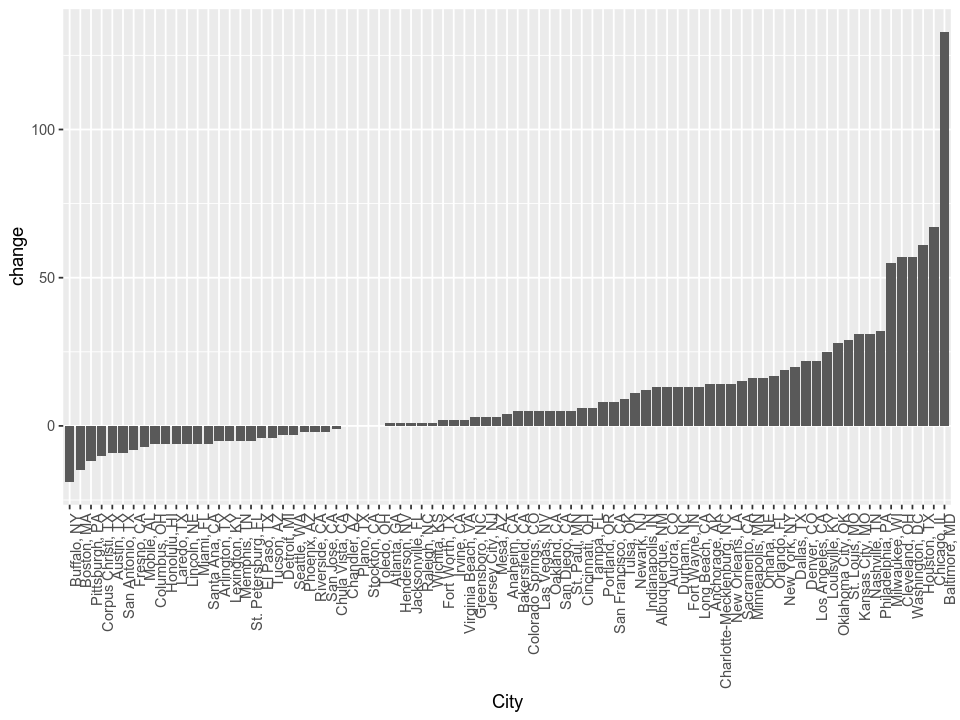

In [25]:
options(repr.plot.width=8, repr.plot.height=6)
df %>% ggplot(aes(reorder(city, change), change)) + geom_col()+ 
theme(axis.text.x = element_text(angle = 90, hjust = 1))+xlab("City")

# 6

Use the optim() function to find the unique positive root of the polynomial

In [26]:
lx =  function(x) (x**4 - 16*x**3 - 32*x**2 - 64*x - 144)
f = function(x) lx(x)**2

In [27]:
xfound = optim(par = 1, fn = f, method = "Brent", lower = 0, upper = 100)

In [28]:
round(xfound$par, 5)

[1] 18

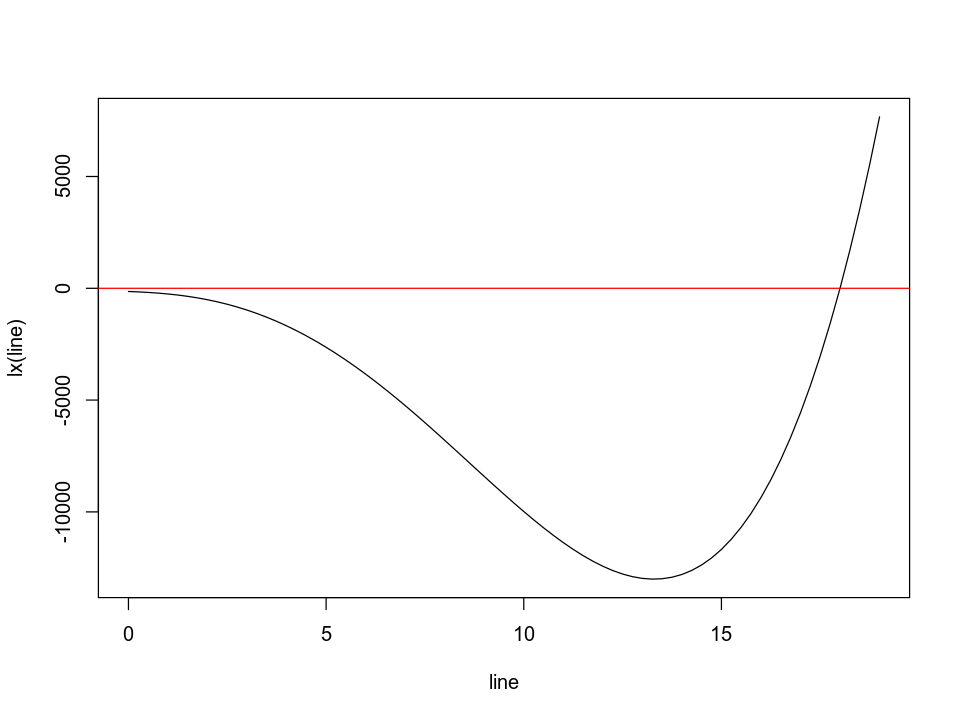

In [29]:
line = seq(0, 19, by = .25)
plot(line, lx(line), type = 'l')
abline(h = 0, col = 'red')

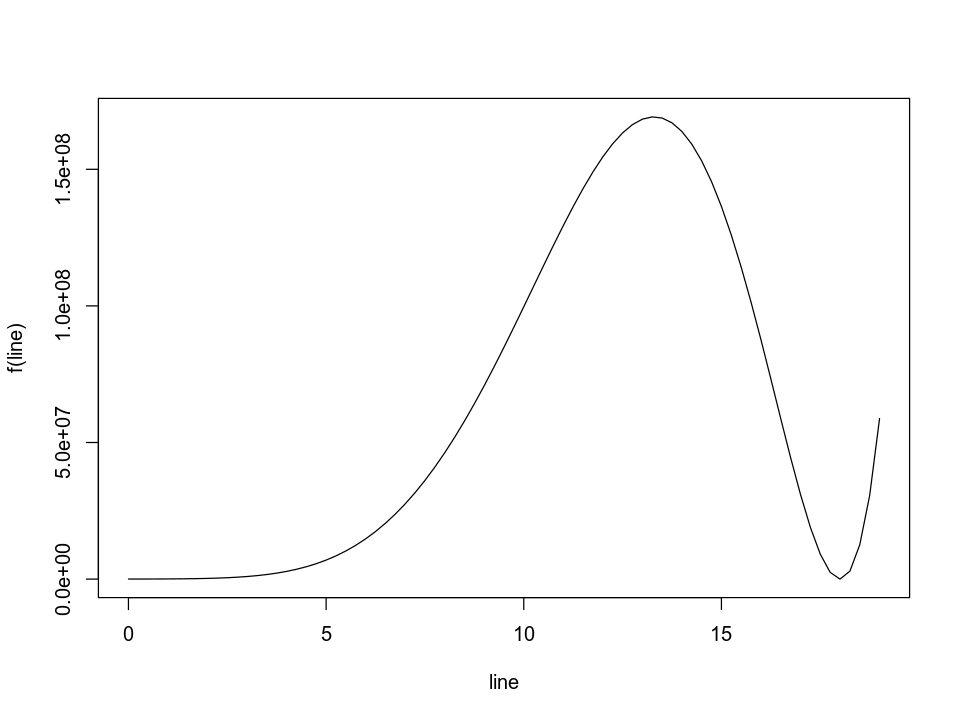

In [30]:
plot(line, f(line), type = 'l')

# 7

In [32]:
is_prime <- function(x) {
    if(x == 2) return(T)
    !any(map_lgl(2:ceiling(sqrt(x)), ~ x %% . == 0 ))
}
map_lgl(2:1000, is_prime) %>% sum

[1] 168

# 8

Given a number $n$, suppose I do the following: start with $x = 1$; reverse the digits of $x$ and add $n$ to
the resulting number. Repeat this process until $x$ takes on a value that it has already taken before, and
then stop. Let $r(n)$ be the number of steps needed until this process stops.
If $n = 1$ then the sequence is
$$
    1 \rightarrow 1 \leftarrow 1 + 1 =2 \cdots 10 \rightarrow 01 \leftarrow 01 + 1 = 2
$$
, so $r(1) = 9$. You can check that $r(2) = 81$.
What is $r(88)$?

In [33]:
r = function(n){
    x_prev = 0
    x_curr = 1
    i = 0
    while(T){
        x_curr = str_split(as.character(x_curr),"")[[1]] #split number in to chrachters
        x_curr = rev(x_curr) # reverse them
        x_curr = as.numeric(str_c(x_curr, collapse = "")) # combine and convert it 
        x_curr = x_curr + n # add n
        if(x_curr %in% x_prev){
            break
        }else{
            x_prev = c(x_prev, x_curr)
        }
        i = i+1
    }
    return(i)
}

In [34]:
r(2)

[1] 81

In [35]:
r(88)

[1] 306

# 9

Consider the following data set:
```
n = 1000
df = tibble(x = runif(n, -1, 1), y = 4 * (x^2 - 1/2)^2 + runif(n, -1, 1) / 3)
```


In [36]:
set.seed(1) # for reproducibility
n = 1000
df = tibble(x = runif(n, -1, 1), y = 4 * (x^2 - 1/2)^2 + runif(n, -1, 1) / 3)

- Compute the linear regression of y on x. Based on the regression results, is x a good predictor of y?


In [37]:
mdl_linear <- lm(y~x,data=df)
summary(mdl_linear)


Call:
lm(formula = y ~ x, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79918 -0.31396 -0.01226  0.28930  0.85272 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.466313   0.012757  36.554   <2e-16 ***
x           -0.002152   0.022128  -0.097    0.923    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4034 on 998 degrees of freedom
Multiple R-squared:  9.474e-06,	Adjusted R-squared:  -0.0009925 
F-statistic: 0.009455 on 1 and 998 DF,  p-value: 0.9226


- Find a better model for predicting y from x, fit it, and provide a numerical measure of how much better this model is at prediction than the model you fit in part a).

In [38]:
mdl_nonlinear <- lm(y~poly(x,4),data=df)
df%>% gather_residuals(mdl_linear, mdl_nonlinear) %>%
group_by(model) %>% summarize(sum(resid^2))

model,sum(resid^2)
mdl_linear,162.40684
mdl_nonlinear,38.82604


- Produce a scatter plot of x and y. Based on the plot, is x and good predictor of y?

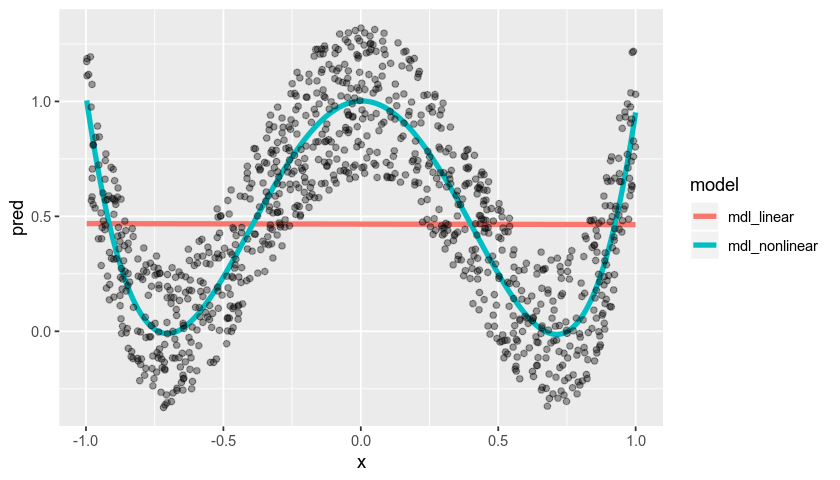

In [39]:
options(repr.plot.width=7, repr.plot.height=4)

df%>% gather_predictions(mdl_linear, mdl_nonlinear) %>% arrange(x) %>%
ggplot(aes(x, pred, color = model)) + geom_line(size = 1.5)  + 
geom_point(aes(x, y), color = "black", alpha = 0.2)

# 10

- What is the median reported age for Jewish respondents?

In [40]:
gss_cat %>% filter(relig == 'Jewish') %>% summarise(med_age = median(age, na.rm=T))

med_age
53


* A millennial is defined to be someone who was 18 or younger in the year 2000. Are the millennials in this survey more likely to identify as atheist (relig == 'None') compared to earlier generations?

In [41]:
gss_cat %>% filter(!is.na(age)) %>% 
mutate(millenial = map_lgl(year-age, ~ 0 <= 18 - 2000 + .),
       atheist = ifelse(relig=="None",1,0)) %>%
       group_by(millenial) %>% summarise(atheist_prop = mean(atheist)) %>% print

# A tibble: 2 x 2
  millenial atheist_prop
  <lgl>            <dbl>
1 FALSE            0.150
2 TRUE             0.292


* Consider the following two possible models relating age and hours spent watching TV:
```
lm(age ~ tvhours)
lm(age ~ poly(tvhours, 2))
```
In your opinion, which model is a better fit to the data and why?


In [42]:
df = gss_cat %>% drop_na(age, tvhours)
mdl1 = lm(age ~ tvhours, df)
mdl2 = lm(age ~ poly(tvhours, 2), df)

In [43]:
df%>% gather_residuals(mdl1, mdl2) %>%
group_by(model) %>% summarize(sum(resid^2))

model,sum(resid^2)
mdl1,3348287
mdl2,3300256


In [44]:
map(list(mdl1, mdl2), summary)

[[1]]

Call:
lm(formula = age ~ tvhours, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.075 -14.181  -1.346  11.875  44.598 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 44.40171    0.24700  179.76   <2e-16 ***
tvhours      0.94471    0.06254   15.11   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.22 on 11297 degrees of freedom
Multiple R-squared:  0.0198,	Adjusted R-squared:  0.01971 
F-statistic: 228.2 on 1 and 11297 DF,  p-value: < 2.2e-16


[[2]]

Call:
lm(formula = age ~ poly(tvhours, 2), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.739 -13.974  -1.111  11.968  47.263 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         47.2188     0.1608  293.64   <2e-16 ***
poly(tvhours, 2)1  260.0550    17.0927   15.21   <2e-16 ***
poly(tvhours, 2)2 -219.1581    17.0927  -12.82   <2e-16 ***
---
Signif. codes:  0 ‘*

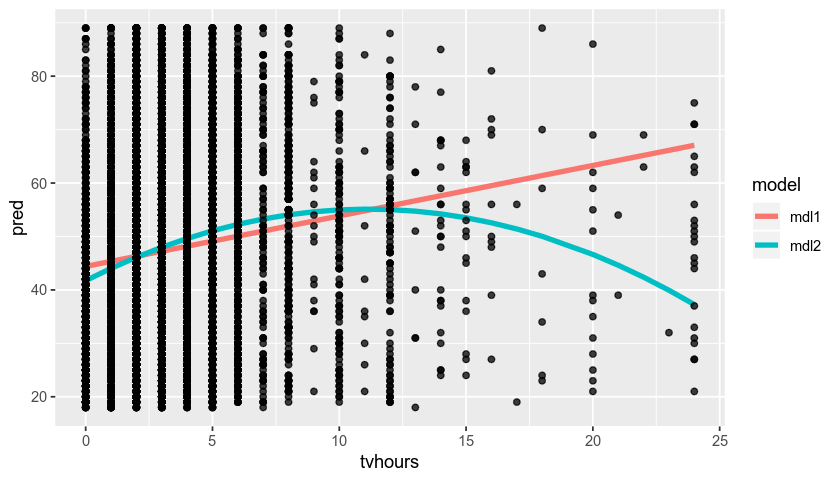

In [45]:
df%>% gather_predictions(mdl1, mdl2) %>% arrange(tvhours) %>%
ggplot(aes(tvhours, pred, color = model)) + geom_line(size = 1.5)  + 
geom_point(aes(tvhours, age), color = "black", alpha = 0.5)

Is there a statistically significant difference in the fraction of white respondents who identified as Christian, compared to non-white respondents? What is the p-value? (Define “Christian” to mean any of the following responses: “Christian”, “Orthodox-christian”, “Catholic”, “Protestant”.)

In [46]:
test_tbl <- gss_cat %>% mutate(white = ifelse(race=="White",1,0), 
                   christian = ifelse(relig %in% c("Christian","Orthodox-christian","Catholic","Protestant"),1,0)) %>% 
            group_by(white) %>% summarise(pop=n(), chris_pop=sum(christian)) %>% print

# A tibble: 2 x 3
  white   pop chris_pop
  <dbl> <int>     <dbl>
1     0  5088      3999
2     1 16395     12755


In [47]:
prop.test(x=test_tbl$chris_pop, n=test_tbl$pop)


	2-sample test for equality of proportions with continuity correction

data:  test_tbl$chris_pop out of test_tbl$pop
X-squared = 1.3963, df = 1, p-value = 0.2373
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.00508428  0.02105606
sample estimates:
   prop 1    prop 2 
0.7859670 0.7779811 


# 11

In [48]:
head(storms)

name,year,month,day,hour,lat,long,status,category,wind,pressure,ts_diameter,hu_diameter
Amy,1975,6,27,0,27.5,-79.0,tropical depression,-1,25,1013,NA,NA
Amy,1975,6,27,6,28.5,-79.0,tropical depression,-1,25,1013,NA,NA
Amy,1975,6,27,12,29.5,-79.0,tropical depression,-1,25,1013,NA,NA
Amy,1975,6,27,18,30.5,-79.0,tropical depression,-1,25,1013,NA,NA
Amy,1975,6,28,0,31.5,-78.8,tropical depression,-1,25,1012,NA,NA
Amy,1975,6,28,6,32.4,-78.7,tropical depression,-1,25,1012,NA,NA


* Each storm is given a name which is unique for that year. Names can be re-used in later years. For example, there has been a storm named Ana in 1979, 1985, 1991, 1997, 2003, 2009 and 2015. One other storm name has been used seven times. What is it?

In [49]:
storms %>% select(name, year) %>% distinct() %>% group_by(name) %>% 
summarise(n = n()) %>% filter(n == 7)

name,n
Ana,7
Claudette,7


- Most of the observations in storms are tropical depressions or tropical storms. How many storms became category 2 or higher hurricanes at some point?
- Reproduce the following plot showing the number of category 2 or higher hurricanes in each year:
- Is the slope of the regression line in the preceding plot significantly different from zero? What does this imply?

In [50]:
# Pipeable functions
Nrow = function(df){
    cat("================ \nNumber of Rows:\n")
    print(df%>%nrow)
    df
}

linear_model_summary = function(df, formula){
    cat("================ \nSummary:\n")
    print(lm(formula, data=df) %>% summary())
    df
}

Number of Rows:
[1] 118
Summary:

Call:
lm(formula = formula, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8788 -1.0711 -0.0070  0.7623  4.8264 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -124.72692   47.71817  -2.614   0.0131 *
year           0.06411    0.02392   2.681   0.0111 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.698 on 35 degrees of freedom
Multiple R-squared:  0.1703,	Adjusted R-squared:  0.1466 
F-statistic: 7.186 on 1 and 35 DF,  p-value: 0.01113



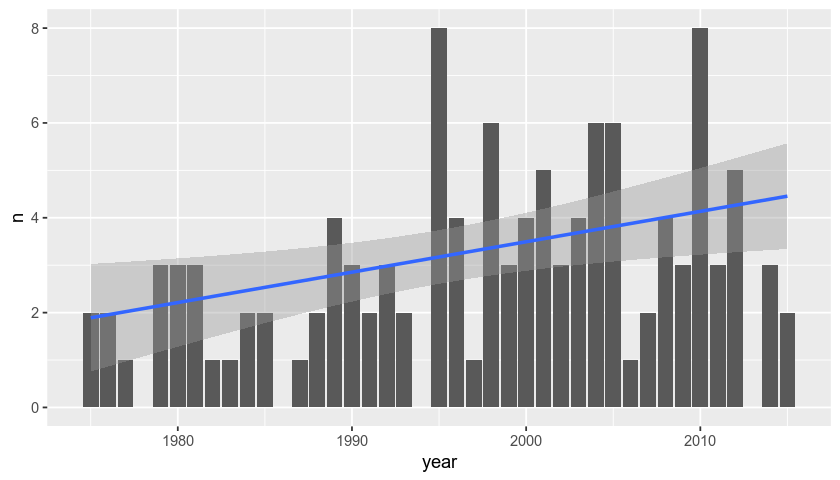

In [51]:
storms %>% filter(status=="hurricane", category >= 2) %>% 
distinct(name, year) %>% Nrow %>% # print number of rows, return dataframe itself
group_by(year) %>% summarise(n = n()) %>% 
linear_model_summary(n~year) %>% # print summary 
ggplot(aes(x=year,y=n)) + geom_col() + geom_smooth(method = "lm")

* In 1985 a hurricane made landfall on Long Island, NY near JFK Airport. What was the name of that hurricane?

In [52]:
storms %>% filter(status=="hurricane", year==1985, lat>=40, lat<=40.7, long<=-73, long>=-73.8)

name,year,month,day,hour,lat,long,status,category,wind,pressure,ts_diameter,hu_diameter
Gloria,1985,9,27,16,40.6,-73.3,hurricane,1,75,961,NA,NA
